# Рынок заведений общественного питания Москвы

Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможет ли кафе снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?  
Нам надо провести исследование рынка. Есть открытые данные о заведениях общественного питания в Москве

**За время проекта были выполнены следующие шаги:**  
* Загрузка и предобработка данных
* Анализ данных
* Вывод

У нас датафрейм, в котором содержится 15366 строк и 6 столбцов  
Информация о столбцах:  
``id`` — идентификатор объекта;  
``object_name`` — название объекта общественного питания;  
``chain`` — сетевой ресторан;  
``object_type`` — тип объекта общественного питания;  
``address`` — адрес;  
``number`` — количество посадочных мест.  

In [1]:
# Импортируем небходимые библиотеки для исследования

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка и предобработкак данных

In [2]:
# Объявим переменную и добавим датафрейм

df = pd.read_csv('/Users/alekseivlasov/Desktop/project/8/rest_data.csv')
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [3]:
# Посмотрим размер таблицы
df.shape

(15366, 6)

В датафрейме 15366 строк и 6 колонок

Масштаб таблицы оценили, теперь изучим общую информацию

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Название столбцов оформлено в правильном стиле, пропусков нет

In [5]:
#Рассмотрим поближе столбец chain
df['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

У нас 2 варианта ответа и подходит больше булевой тип данных. Заменим ``Нет`` на ``0`` и ``Да`` на ``1``    
После чего поменяем тип данных

In [6]:
df['chain'] = df['chain'].replace('нет', 0, regex=True)
df['chain'] = df['chain'].replace('да', 1, regex=True)
df['chain'] = df['chain'].astype('bool')

In [7]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Мы поменяли тип данных в столбце ``chain``, в других колонках приведен правильный тип данных

В столбце ``object_name`` назавания написаны совершенно различным способом. Приведем к единому виду

In [8]:
df['object_name'] = df['object_name'].str.lower()
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [9]:
# Проверим таблицу на дубли
df[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated().sum()

85

Мы просмотрели дубли без id и нашли 85 дублей, это меньше 0,01% поэтому удаляем дубли

In [10]:
# Удалим дубли 
df = df.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number'])

In [11]:
df[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated().sum()

0

Мы сделали передобратку данных и теперь данные готовы к исследованию

## Анализ данных

### Исследуем соотношение видов объектов общественного питания по количеству  
Для этого сгруппируем данные по видам общественного питания

In [12]:
df_object_type = (
    df.groupby(by='object_type')
    .agg({'id':'count'})
    .sort_values(by='id', ascending=False)
    .reset_index()
)   
df_object_type.head()

,object_type,id
0,кафе,6071
1,столовая,2584
2,ресторан,2282
3,предприятие быстрого обслуживания,1897
4,бар,855


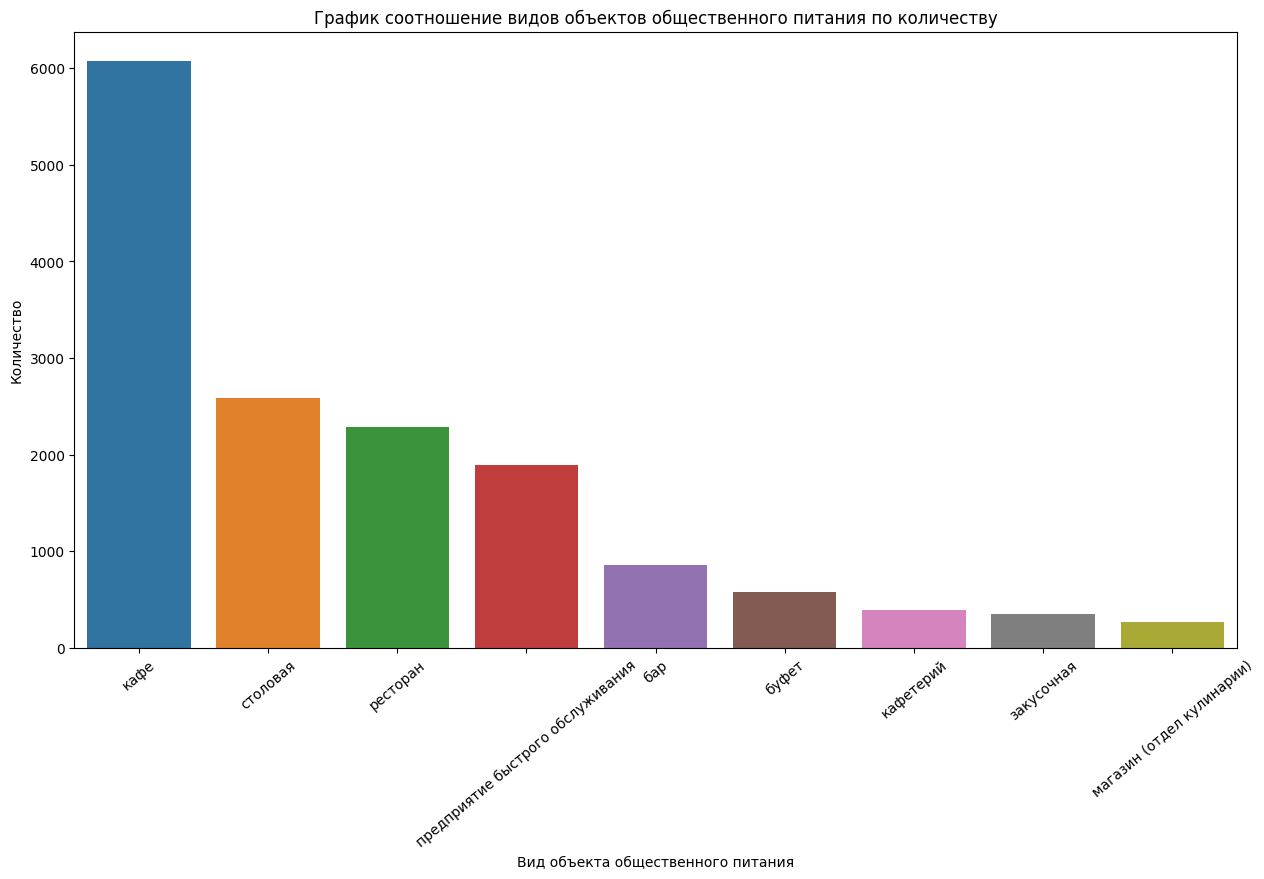

In [13]:
# Нарисуем график
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='object_type', y='id', data=df_object_type)
ax.set_title('График соотношение видов объектов общественного питания по количеству')
ax.set_xlabel('Вид объекта общественного питания')
ax.set_ylabel('Количество')
plt.xticks(rotation=40)
plt.show()

На графике мы видим 9 видов объектов общественного питания. На первом месте - "Кафе", а на последнем - "Магазин (отдел кулинарии)"

### Исследуем соотношение сетевых и несетевых заведений по количеству

Здесь нам тоже понадобится столбчатая диаграмма 

In [14]:
df_chain = (
    df.groupby(by='chain')
    .agg({'id':'count'})
    .reset_index()
)
df_chain

,chain,id
0,False,12317
1,True,2964


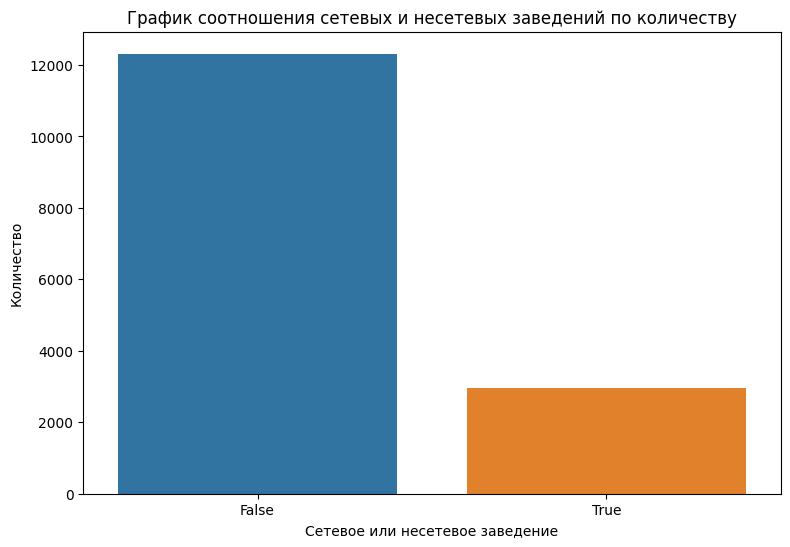

In [15]:
# Построрим график
fig, ax = plt.subplots(figsize=(9,6))
ax = sns.barplot(x='chain', y='id', data=df_chain)
ax.set_title('График соотношения сетевых и несетевых заведений по количеству')
ax.set_xlabel('Сетевое или несетевое заведение')
ax.set_ylabel('Количество')
plt.show()

На графике видно, что несетевых заведений больше, чем сетевых в 4 раза

### Проверим, для какого вида объекта общественного питания характерно сетевое распространение 

In [16]:
df_chain_object = (df.groupby(['object_type', 'chain'])
                   .agg({'id':'count'})
                   .reset_index()
)
df_chain_object.head()

,object_type,chain,id
0,бар,False,818
1,бар,True,37
2,буфет,False,565
3,буфет,True,11
4,закусочная,False,292


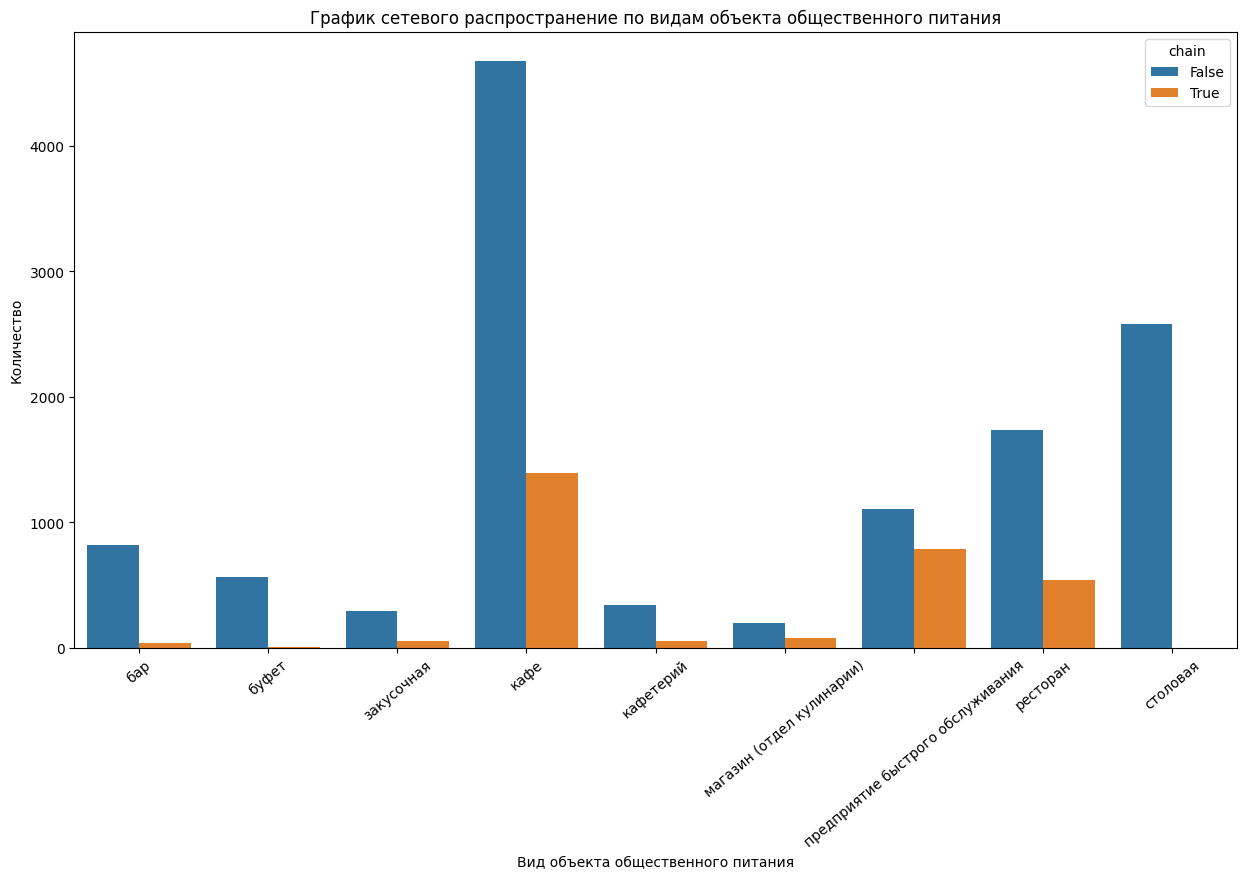

In [17]:
# Нарисуем график

fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='object_type', y='id', hue='chain', data=df_chain_object)
ax.set_title('График сетевого распространение по видам объекта общественного питания')
ax.set_xlabel('Вид объекта общественного питания')
ax.set_ylabel('Количество')
plt.xticks(rotation=40)
plt.show()

Распространение несетевым путем характерно почти для каждого вида объектов  
Важный момент, что все перечисленные объекты развиваются не только несетевым путем, а также и сетевым, в меньшей мере

### Проверим, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест

Для проверки нам потребуется отфильтровать данные

In [18]:
df_filtred = (df.query('chain == True')
              .groupby(by='object_name')
              .agg({'id':'count', 'number':'mean'})
)

In [19]:
df_filtred.head()

,id,number
object_name,,
beverly hills diner,1,88.000000
bierloga,1,75.000000
black & white,1,40.000000
bocconcino,3,66.666667
boobo,1,46.000000


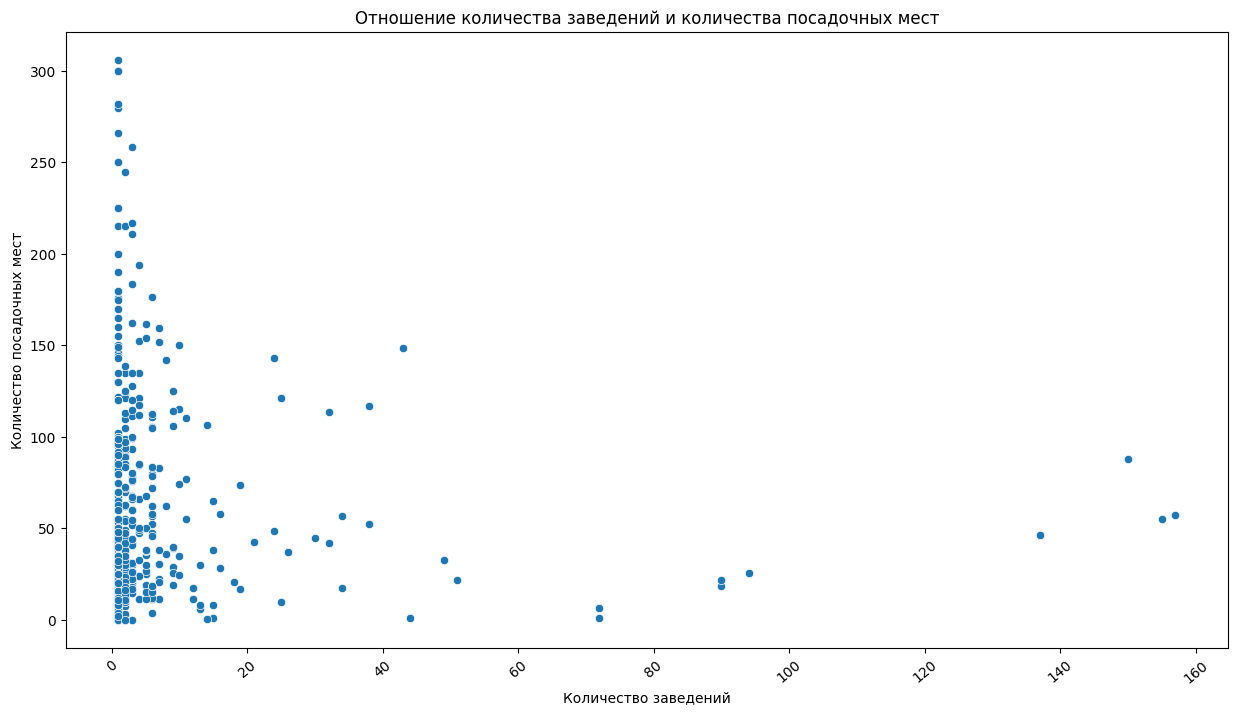

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.scatterplot(x='id', y='number', data=df_filtred)
ax.set_title('Отношение количества заведений и количества посадочных мест')
ax.set_xlabel('Количество заведений')
ax.set_ylabel('Количество посадочных мест')
plt.xticks(rotation=40)
plt.show()

Для сетевых заведений характерно: чем больше заведений, тем меньше посадочных мест

### Для каждого вида объекта общественного питания определим среднее количество посадочных мест

Проверим, какой вид предоставляет в среднем самое большое количество посадочных мест

In [21]:
df_number_mean = (df.groupby(by='object_type')
                  .agg({'number':'mean'})
                  .sort_values(by='number', ascending=False)
                  .reset_index()
)
df_number_mean.head()

,object_type,number
0,столовая,130.337848
1,ресторан,96.884750
2,буфет,51.425347
3,бар,43.533333
4,кафе,39.785703


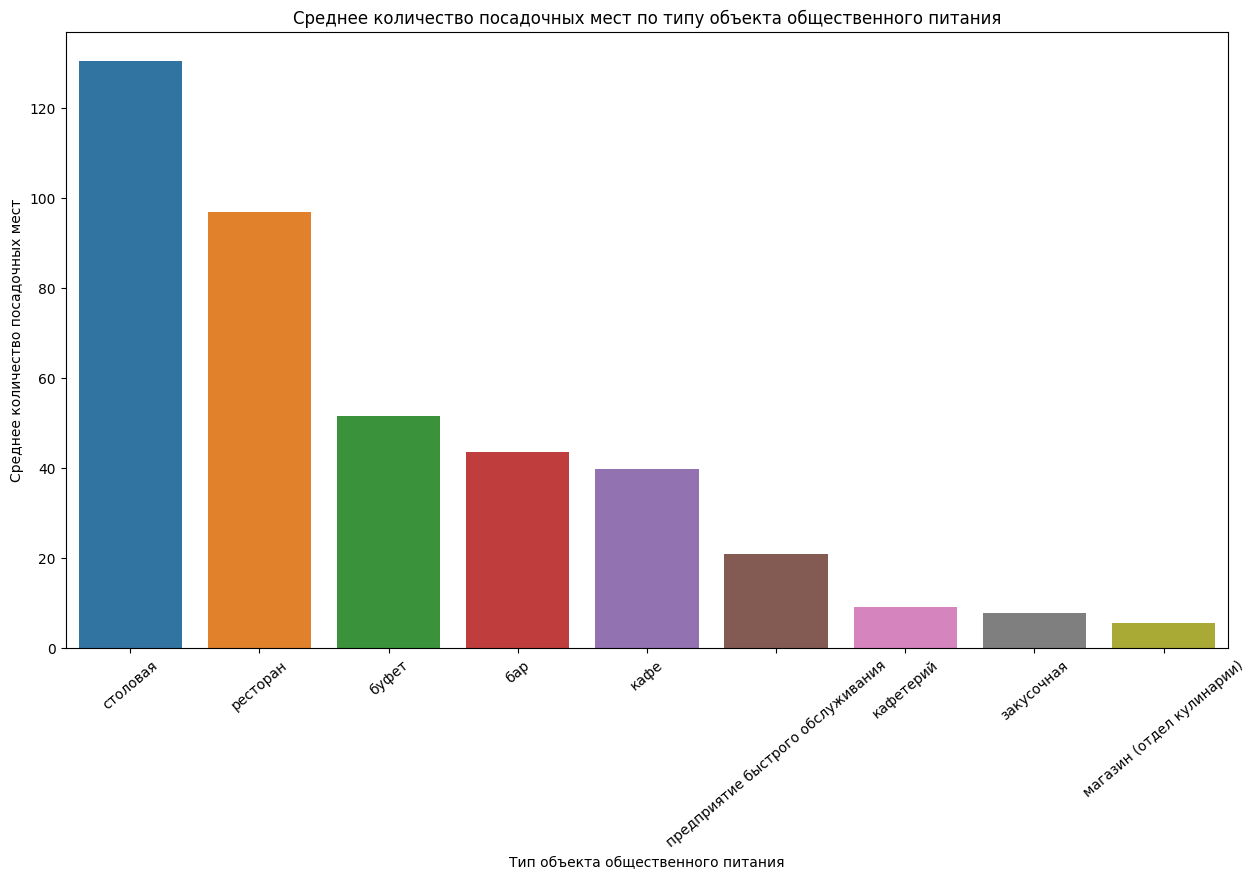

In [22]:
# Рисуем график

fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='object_type', y='number', data=df_number_mean)
ax.set_title('Среднее количество посадочных мест по типу объекта общественного питания')
ax.set_xlabel('Тип объекта общественного питания')
ax.set_ylabel('Среднее количество посадочных мест')
plt.xticks(rotation=40)
plt.show()

По количеству посадочных мест лидируют столовые, они подразумевают в себе большие залы, именно поэтому в столовых много посадочных мест

In [23]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Для дальнейшего исследования выделим в отдельный столбец информацию об улице из столбца ``address``

In [24]:
df['street'] = df['address'].str.lower()
df['street'] = df['street'].str.split(",")
df['street'] = df['street'].apply(lambda x: x[1])
df.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица егора абакумова
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица


### Построим график топ-10 улиц по количеству объектов общественного питания


Перед тем, как определить топ-10 улиц, нам необходимо воспользоваться внешней информацией и добавить районы в наш датафрейм

In [25]:
#Загрузим таблицу из открытого источника,где есть район

from io import BytesIO
import requests
spreadsheet_id = '1yqnHrUl418SeSlsJNx0IfutMmzrZC6yMgq4Jzp9QYW4'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df_district = pd.read_csv(BytesIO(r.content))
df_district.head() 

,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,SeatsCount,SocialPrivileges,Longitude_WGS84,Latitude_WGS84,geodata_center,geoarea
0,Код,Наименование,global_id,Является сетевым,Название управляющей компании,Вид объекта,Административный округ по адресу,Район,Адрес,Контактный телефон,Число посадочных мест,Показатель социальных льгот,Долгота в WGS-84,Широта в WGS-84,geodata_center,geoarea
1,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,48,нет,37.7145650004360390,55.8790015313033730,NaN,NaN
2,000077874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",PublicPhone:(495) 676-55-35\n\n,35,нет,37.6733061300344000,55.7382386551547000,NaN,NaN
3,000024309,Кафе «Академия»,637376349,нет,NaN,ресторан,Центральный административный округ,Таганский район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(495) 662-30-10\n\n,95,нет,37.6696475969381000,55.7355114718314000,NaN,NaN
4,000027429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",PublicPhone:(499) 908-06-15\n\n,240,нет,37.5669400000000020,55.9040188006692200,NaN,NaN


In [26]:
#Объединим таблицы

df_new = df[['id', 'address', 'street', 'number']]

df_new_distr = df_district[['District', 'Address']]
df_new_distr.columns = df_new_distr.columns.str.lower()

df_final = df_new.merge(df_new_distr, on='address', how='left')
df_final = df_final[['id', 'street', 'district' ,'number']].drop_duplicates()

df_final.head()

,id,street,district,number
0,151635,улица егора абакумова,Ярославский район,48
1,77874,улица талалихина,Таганский район,35
2,24309,абельмановская улица,NaN,95
3,21894,абрамцевская улица,район Лианозово,40
5,119365,абрамцевская улица,NaN,50


In [27]:
df_final.shape

(15410, 4)

У нас образовались пропуски по районам, их мы заменим специальным символом ``unknown``

In [28]:
df_final['district'] = df_final['district'].fillna(value = 'unknown')

In [29]:
df_final['district'].isna().sum()

0

In [30]:
#Теперь определим топ-10 улиц по количеству объектов
top_streets = (df_final.query('street != " город зеленоград" and street != " поселение сосенское"')
               .groupby(by = 'street')
               .agg({'id':'count'})
               .sort_values(by='id', ascending=False)
               .reset_index()
               .head(10)
               
)
top_streets

,street,id
0,проспект мира,203
1,профсоюзная улица,181
2,ленинградский проспект,170
3,пресненская набережная,167
4,кутузовский проспект,165
5,варшавское шоссе,161
6,ленинский проспект,147
7,проспект вернадского,128
8,каширское шоссе,111
9,кировоградская улица,108


In [31]:
# Сделаем уникальные пары улица - район
street_and_district = df_final.drop_duplicates(subset=['street', 'district'])
street_and_district.head()

,id,street,district,number
0,151635,улица егора абакумова,Ярославский район,48
1,77874,улица талалихина,Таганский район,35
2,24309,абельмановская улица,unknown,95
3,21894,абрамцевская улица,район Лианозово,40
5,119365,абрамцевская улица,unknown,50


In [32]:
#Сгруппируем по улицам и сделаем список с районами
street_and_district = (street_and_district.groupby('street')
                       .agg({'district':list})
                       .reset_index()
)
street_and_district.head()

,street,district
0,1-й автозаводский проезд,[unknown]
1,1-й амбулаторный проезд,[район Аэропорт]
2,1-й балтийский переулок,[район Аэропорт]
3,1-й басманный переулок,[Красносельский район]
4,1-й ботанический проезд,[район Свиблово]


Соединим таблицы, чтобы посмотреть, в каких районах расположены наши топ-10 улиц

In [33]:
df_top_street = top_streets.merge(street_and_district, on='street', how='left')
df_top_street

,street,id,district
0,проспект мира,203,"[Мещанский район, unknown, Останкинский район,..."
1,профсоюзная улица,181,"[unknown, район Черёмушки, район Тёплый Стан, ..."
2,ленинградский проспект,170,"[район Беговой, район Аэропорт, unknown, район..."
3,пресненская набережная,167,"[Пресненский район, unknown]"
4,кутузовский проспект,165,"[unknown, район Дорогомилово, район Фили-Давыд..."
5,варшавское шоссе,161,"[unknown, Донской район, район Чертаново Южное..."
6,ленинский проспект,147,"[район Якиманка, Донской район, unknown, Гагар..."
7,проспект вернадского,128,"[unknown, Ломоносовский район, район Тропарёво..."
8,каширское шоссе,111,"[unknown, район Москворечье-Сабурово, район Ор..."
9,кировоградская улица,108,"[район Чертаново Центральное, unknown, район Ч..."


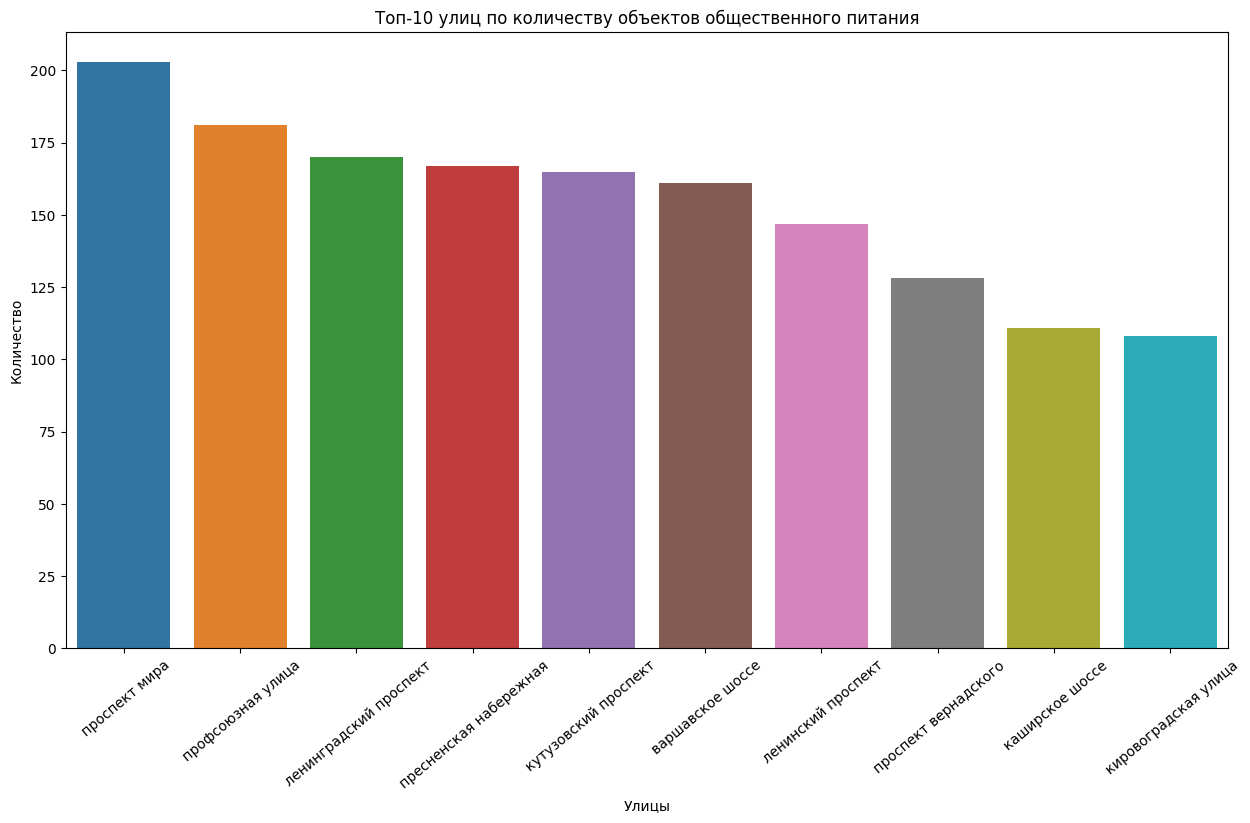

In [34]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='street', y='id', data=top_streets)
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
ax.set_xlabel('Улицы')
ax.set_ylabel('Количество')
plt.xticks(rotation=40)
plt.show()

Мы определили топ-10 улиц по количеству объектов общественного питания и узнали, в каких районах они находятся  
Проспект мира - на первом месте по количеству объектов общественного питания

### Найдем число улиц с одним объектом общественного питания

In [35]:
one_object = (df_final.groupby(by='street')
              .agg({'id':'count', 'district':'max'})
              .query('id == 1')
              .reset_index()
)
display(one_object.head())
display(one_object.shape)

,street,id,district
0,1-й балтийский переулок,1,район Аэропорт
1,1-й басманный переулок,1,Красносельский район
2,1-й ботанический проезд,1,район Свиблово
3,1-й вешняковский проезд,1,unknown
4,1-й голутвинский переулок,1,район Якиманка


(579, 3)

579 улиц с одним объектом общественного питания

Теперь сгруппируем датафрейм по районам, чтобы посмотреть, в каких районах Москвы находятся эти улицы, с расчетом числа улиц с 1 заведениев в каждом из нах

In [36]:
one_object = (one_object.groupby('district').agg({'id':'count'})
              .reset_index()
              .rename(columns={'id':'street_number'})
)

one_object.head(5)

,district,street_number
0,unknown,237
1,Алексеевский район,6
2,Алтуфьевский район,2
3,Бабушкинский район,5
4,Басманный район,16


Мы получили количество улиц с одним объектом общественного питания и обнурижили, что большая часть улиц распалагается в центральной части города  
Это связано с тем, что в целом заведения чаще распологаются ближе к центру города  
Также сгруппировали данные по районам и получили количество улиц по каждому району

## Вывод

Мы проанализировали открытые данные о заведениях общественного питания в Москве, для того, чтобы можно было выбрать максимально правильную локацию, вид заведения и объем  

* В исследовании участвовало 15366 заведений
* По количеству заведений лидирует Кафе, на этот вид объекта стоит обратить внимание
* Сетевых заведений в 4 раза больше, чем не сетевых
* Распростронение сетевым путем характерно для: столовых, кафетерий, буфетов и магазинов(отдел кулинарии)
* Для сетевых заведений характерно: много заведений с небольшим числом посадочных мест в каждом
* Для кафе среднее количество посадочных мест: 40, на это количество стоит обратить внимание
* Лучше всего открываться на Проспекте мира, так как эта улица пользуется пополуярностью у заведений


Презентация: <https://drive.google.com/file/d/1G8QYO6LCS-t02Iqw32z6NVA1_cQNMQ8W/view?usp=sharing>